# **Visualisation des données** 
Dans cette partie nous allons procéder à la visualisation des données obtenues à la fois à base du scrapping et de l'API de TMDB. Parmi les graphiques que nous souhaitons réaliser : 

-  Les nuages de mots répresentant les genres les plus populaires:
    *  dans toute la base TMDB
    *  Parmi les films nominés aux Oscars/Césars (Award_mains = 1)
    *  Parmi les films nominés aux festivals (Award_fest = 1)
 
- Les budgets de films par genre
- Les moyennes de budget par film pour les différentes compétitions - César, Oscar, Cannes et Venise
- L'évolution temporelle de budgets de films
- L'évolution temporelle des notes distribuées par les utilisatuers (trouve-t-on des films plus récents meilleurs?)
- Les notes données par les utilisateurs:
    * par catégorie de compétition
    * par décennie
    * par genre de film 


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

## Évolution temporelle du budget moyen des films

Dans un premier temps, nous allons essayer de comparer les différents budget des films en fonction de plusieurs critères, afin de voir à quel point le budget d'un film peut être un critère intéressant dans un algorithme de recommendation. Nous commençons par un premier graphique afin de représenter l'évolution du budget moyen à travers le temps.

/tmp/ipykernel_23395/3948636754.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['release_date'].dt.year.astype(int)


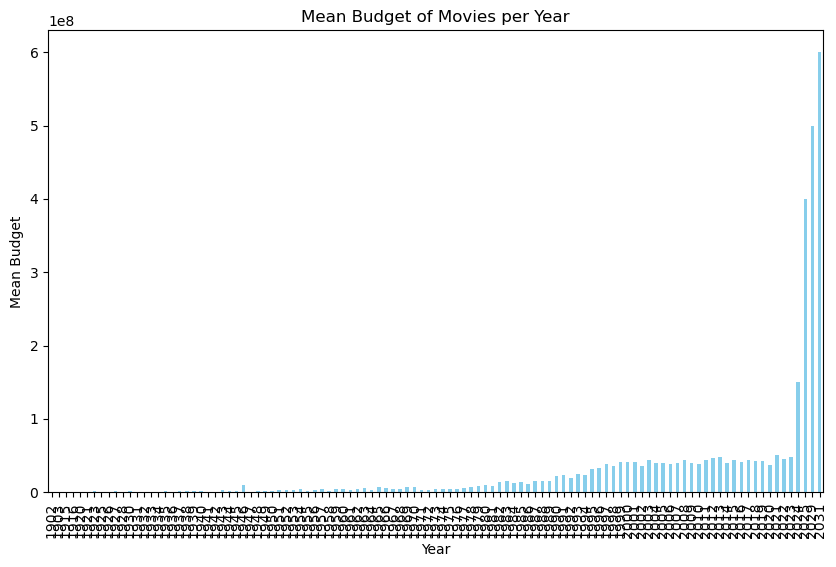

/tmp/ipykernel_23395/3948636754.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['decade'] = ((df_filtered['release_date'].dt.year // 10) * 10).astype(int)


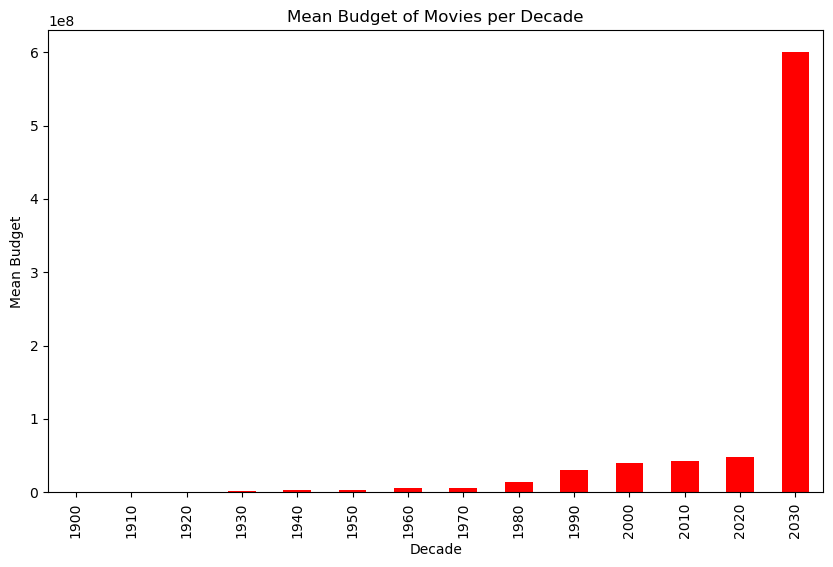

In [28]:
df = pd.read_csv('../cleaning_data/Final_database.csv')
df.drop_duplicates()

df['release_date'] = pd.to_datetime(df['release_date'])
df = df.dropna(subset=['release_date'])
# On exclut les films pour lequel le budget n'est pas renseigné, auquel cas il est égal à 0 dans la base
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df_filtered = df[df['budget'] != 0]
df_filtered

# Par années
# On récupère l'année de sortie du film
df_filtered['year'] = df_filtered['release_date'].dt.year.astype(int)
# On regroupe par année pour calculer la moyenne
mean_budget_per_year = df_filtered.groupby('year')['budget'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mean_budget_per_year.plot(kind='bar', color='skyblue')
plt.title('Mean Budget of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Mean Budget')
plt.show()


# Par décennies
# On récupère la décennie de sortie du film
df_filtered['decade'] = ((df_filtered['release_date'].dt.year // 10) * 10).astype(int)

# Group by decade and calculate the mean budget
mean_budget_per_decade = df_filtered.groupby('decade')['budget'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mean_budget_per_decade.plot(kind='bar', color='r')
plt.title('Mean Budget of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Budget')
plt.show()



In [29]:
df_filtered['decade'].value_counts()

decade
2010    2079
2000    1716
1990    1029
2020     700
1980     622
1970     261
1960     172
1950     110
1940      61
1930      36
1920      19
1900       8
2030       4
1910       2
Name: count, dtype: int64

In [30]:
df_filtered[df_filtered['decade'] == 2030]

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,genres_list,countries_prod,languages_list,prod_companies,Award_mains,Mains_cat,Award_fest,Fest_cat,year,decade
9273,False,600000000,393209,tt5637536,en,Avatar 5,NaN,31.288,2031-12-18,0.0,...,"['Action', 'Adventure', 'Science Fiction']",['United States of America'],['English'],"[('Lightstorm Entertainment', 'US'), ('20th Ce...",NaN,NaN,NaN,NaN,2031,2030
9274,False,600000000,393209,tt5637536,en,Avatar 5,NaN,31.288,2031-12-18,0.0,...,"['Action', 'Adventure', 'Science Fiction']",['United States of America'],['English'],"[('Lightstorm Entertainment', 'US'), ('20th Ce...",NaN,NaN,NaN,NaN,2031,2030
9297,False,600000000,393209,tt5637536,en,Avatar 5,NaN,31.288,2031-12-18,0.0,...,"['Action', 'Adventure', 'Science Fiction']",['United States of America'],['English'],"[('Lightstorm Entertainment', 'US'), ('20th Ce...",NaN,NaN,NaN,NaN,2031,2030
9298,False,600000000,393209,tt5637536,en,Avatar 5,NaN,31.288,2031-12-18,0.0,...,"['Action', 'Adventure', 'Science Fiction']",['United States of America'],['English'],"[('Lightstorm Entertainment', 'US'), ('20th Ce...",NaN,NaN,NaN,NaN,2031,2030


Plusieurs problèmes se présentent d'ores et déjà : les films Avatar, qui ne sont pas encore sortis, mais prévus pour jusqu'en 2030 vont fausser les visualisations. De plus, ces lignes qui paraissent identiques ont résisté à la méthode drop_duplicates()... Nous allons donc reprendre les graphiques en enlevant les années et décennies n'étant pas assez fournies pour être intéressantes pour nous.

/tmp/ipykernel_23395/2839526949.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['release_date'].dt.year.astype(int)


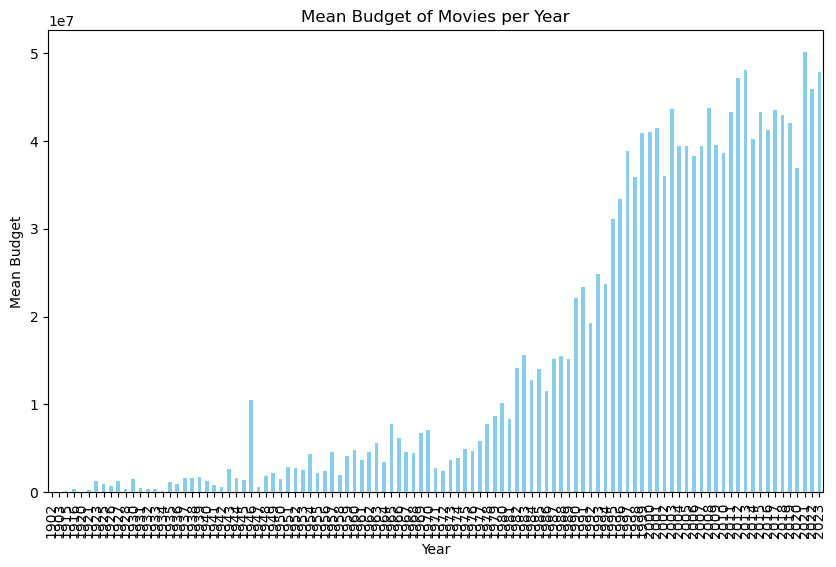

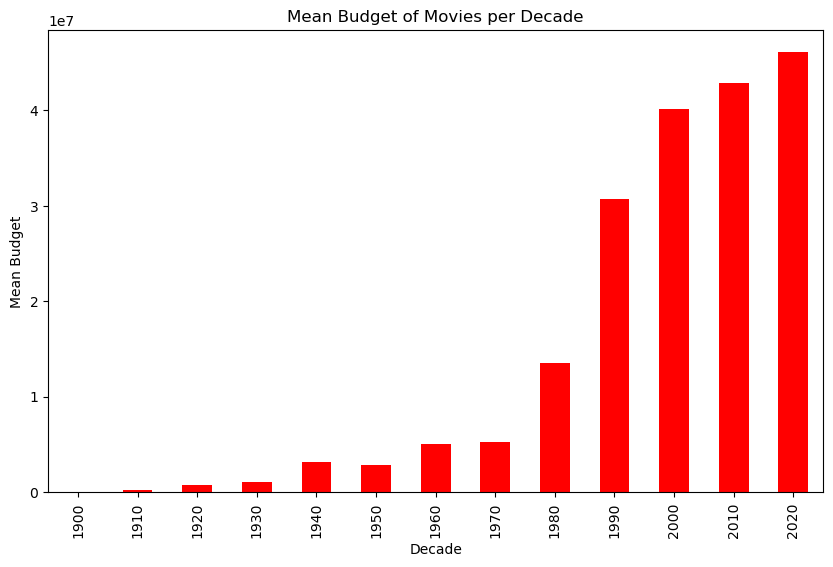

In [38]:
df = pd.read_csv('../cleaning_data/Final_database.csv')
df.drop_duplicates()

df['release_date'] = pd.to_datetime(df['release_date'])
df = df.dropna(subset=['release_date'])
# On exclut les films pour lequel le budget n'est pas renseigné, auquel cas il est égal à 0 dans la base
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df_filtered = df[df['budget'] != 0]


# Par années
# On récupère l'année de sortie du film
df_filtered['year'] = df_filtered['release_date'].dt.year.astype(int)
df_filtered = df_filtered[~df_filtered['year'].isin(range(2024,2032))]

# On regroupe par année pour calculer la moyenne
mean_budget_per_year = df_filtered.groupby('year')['budget'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mean_budget_per_year.plot(kind='bar', color='skyblue')
plt.title('Mean Budget of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Mean Budget')
plt.show()


# Par décennies
# On récupère la décennie de sortie du film
df_filtered['decade'] = ((df_filtered['release_date'].dt.year // 10) * 10).astype(int)

# Group by decade and calculate the mean budget
mean_budget_per_decade = df_filtered.groupby('decade')['budget'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mean_budget_per_decade.plot(kind='bar', color='r')
plt.title('Mean Budget of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Budget')
plt.show()

Ces graphiques sont maintenant un peu plus lisibles, et surtout moins biaisés, puisque pour les années postérieures à 2023, la base ne contenait pas plus d'un film par an, ce qui donnait une moyenne biaisée. 

## Évolution temporelle de la moyenne des notes 

Nous allons maintenant nous intéresser à l'évolution des notes moyennes par années (et décennie) pour voir si l'on peut remarquer un biais de récence ("recency bias").

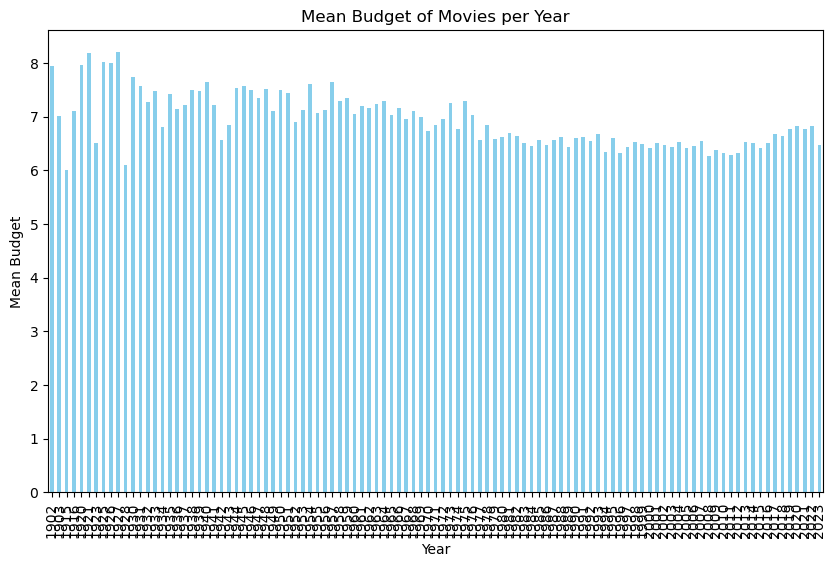

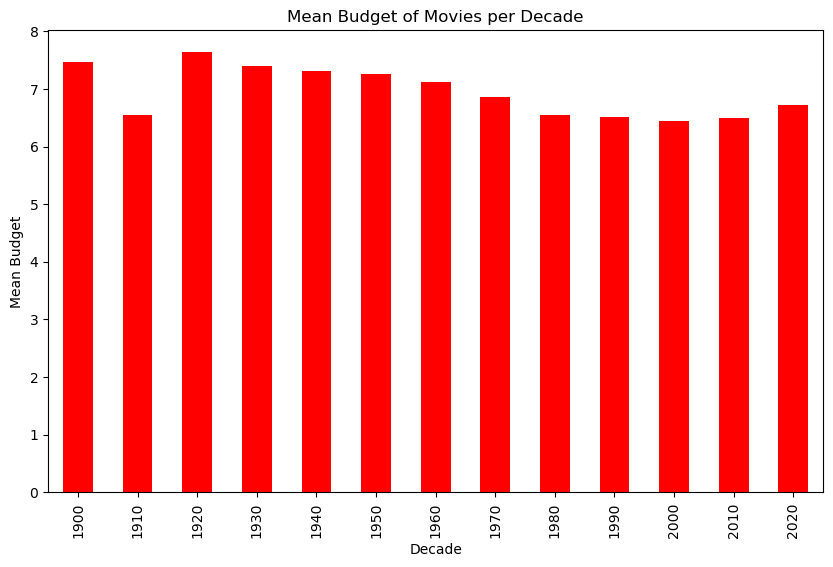

In [39]:
df = pd.read_csv('../cleaning_data/Final_database.csv')
df.drop_duplicates()

df['release_date'] = pd.to_datetime(df['release_date'])
df = df.dropna(subset=['release_date'])

# Par années
# On récupère l'année de sortie du film
df_filtered['year'] = df_filtered['release_date'].dt.year.astype(int)
df_filtered = df_filtered[~df_filtered['year'].isin(range(2024,2032))]

# On regroupe par année pour calculer la moyenne
mean_budget_per_year = df_filtered.groupby('year')['vote_average'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mean_budget_per_year.plot(kind='bar', color='skyblue')
plt.title('Mean Budget of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Mean Budget')
plt.show()


# Par décennies
# On récupère la décennie de sortie du film
df_filtered['decade'] = ((df_filtered['release_date'].dt.year // 10) * 10).astype(int)

# Group by decade and calculate the mean budget
mean_budget_per_decade = df_filtered.groupby('decade')['vote_average'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mean_budget_per_decade.plot(kind='bar', color='r')
plt.title('Mean Budget of Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Budget')
plt.show()

Bien sur, au vu de la petite taille de notre base, et donc pour certaines années d'un manque probable de données, nous ne pouvons tirer de conclusions, mais le biais de récence ne semble pas vérifié.

## Budget moyen par genre

Nous allons maintenant représenter le budget moyen par films en fonction du genre du film. Toutefois, dans notre base, la colonne genre comporte des listes rassemblant le ou les genres de chaque film. Nous allons donc utiliser la méthode explode pour duppliquer chaque lignes pour cahqeu genre dans la liste, et ensuite regrouper par genre individuel.

/tmp/ipykernel_23395/3139015898.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['genres_list'] = df_filtered['genres_list'].apply(ast.literal_eval)


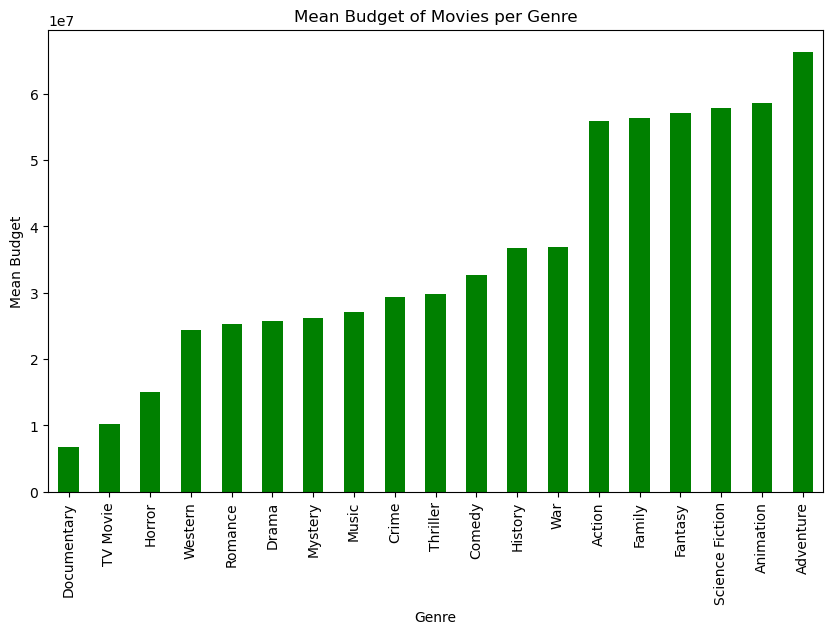

In [53]:
df = pd.read_csv('../cleaning_data/Final_database.csv')
df.drop_duplicates()

# Convert 'Budget' to numeric values, handling errors by coercing them to NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df_filtered = df[df['budget'] != 0]


# Explode the 'Genre' column to create separate rows for each genre
df_filtered['genres_list'] = df_filtered['genres_list'].apply(ast.literal_eval)
df_genre = df_filtered.explode('genres_list')

# Group by genre and calculate the mean budget
mean_budget_per_genre = df_genre.groupby('genres_list')['budget'].mean()

# Plot the results with manual x-axis labels
plt.figure(figsize=(10, 6))
mean_budget_per_genre.sort_values().plot(kind='bar', color='g')
plt.title('Mean Budget of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Budget')
plt.show()


## Notes moyennes des utilisateurs par genre

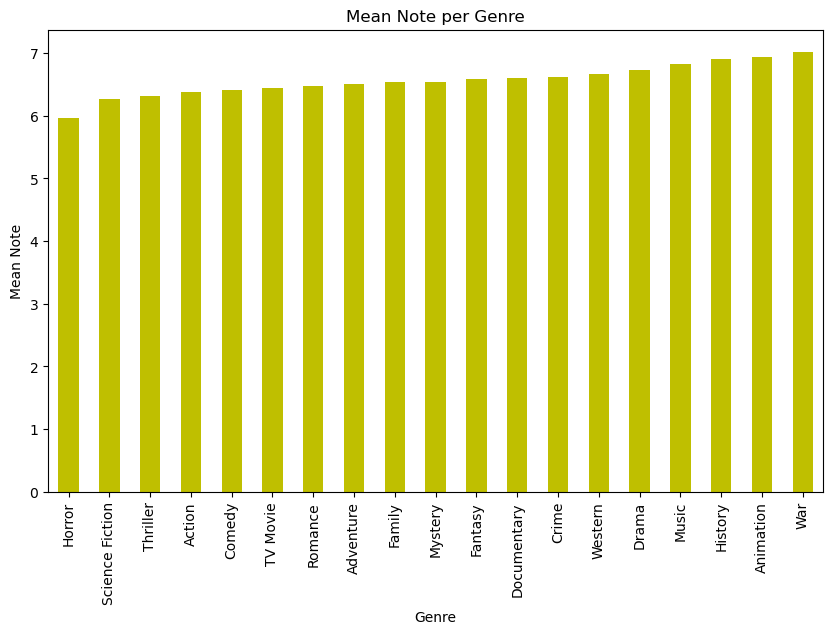

In [62]:
df = pd.read_csv('../cleaning_data/Final_database.csv')
df.drop_duplicates()

df['genres_list'] = df['genres_list'].apply(ast.literal_eval)
df_genre = df.explode('genres_list')
df_genre['genres_list']
# Group by genre and calculate the mean budget
mean_note_per_genre = df_genre.groupby('genres_list')['vote_average'].mean()

# Plot the results with manual x-axis labels
plt.figure(figsize=(10, 6))
mean_note_per_genre.sort_values().plot(kind='bar', color='y')
plt.title('Mean Note per Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Note')
plt.show()

## Budget moyen par compétition

Ayant beaucoup moins de données correspondant aux différentes compétitions, ces résultats seront probablement moins précis, mais ils permettront toutefois d'avoir une idée de la base que nous manipulons. Nous allons d'abord nous intéresser aux compétitions "mainstream", puis aux festivals.

In [66]:
df = pd.read_csv('../cleaning_data/Final_database.csv')
df.drop_duplicates()

# Convert 'Budget' to numeric values, handling errors by coercing them to NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df_filtered = df[df['budget'] != 0]


# Explode the 'Genre' column to create separate rows for each genre
df_mains = df_filtered[df_filtered['Award_mains'] > 0]

# Group by genre and calculate the mean budget
mean_budget_mains = df_mains['budget'].mean()
mean_budget_mains
# Plot the results with manual x-axis labels
#plt.figure(figsize=(10, 6))
#mean_budget_mains.sort_values().plot(kind='bar', color='g')
#plt.title('Mean Budget of Movies Awarded in Mainstream Competitions')
#plt.xlabel('Movies')
#plt.ylabel('Mean Budget')
#plt.show()

30472567.45

In [ ]:
df = pd.read_csv('../cleaning_data/Final_database.csv')
df.drop_duplicates()

# Convert 'Budget' to numeric values, handling errors by coercing them to NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df_filtered = df[df['budget'] != 0]


# Explode the 'Genre' column to create separate rows for each genre
df_fes = df_filtered[df_filtered['Award_fest'] > 0]

# Group by genre and calculate the mean budget
mean_budget_mains = df_mains['budget'].mean()
mean_budget_mains
# Plot the results with manual x-axis labels
#plt.figure(figsize=(10, 6))
#mean_budget_mains.sort_values().plot(kind='bar', color='g')
#plt.title('Mean Budget of Movies Awarded in Mainstream Competitions')
#plt.xlabel('Movies')
#plt.ylabel('Mean Budget')
#plt.show()